# **Mô tả bài toán**


# 1.   Business understanding
Hiện tại công ty vận hành với 5 loại dịch vụ TRUCK: Tricycle, Van 500, Truck 1000, Truck 2000, Van 1000 ở các thành phố SGN, HAN, BDG, DNI. Với quy mô đang trên đà phát triển phủ rộng dịch vụ đến KH. Song song đó vẫn tồn tại những vấn đề như tỷ lệ fulfill đơn hàng còn thấp, hay thiếu tài xế khi KH có nhu cầu. 
Để giải quyết, cần có mô hình dự báo nhu cầu phục vụ cho việc kiểm soát nhu cầu cũng như nâng cao khả năng fulfill đơn.
# 2.   Data understanding
Từ mục tiêu/vấn đề đã xác định: xem xét các dữ liệu mà công ty đang có:


*   Dữ liệu được lấy từ metabase của công ty, sử dụng ngôn ngữ SQL 
*   Dữ liệu theo tuần, từ tháng 5/2021 đến 3/2022.
*   Request thể hiện lượng nhu cầu đến từ khách hàng. 1 request tương ứng 1 đơn và 1 đơn có thể có 1 hoặc nhiều stoppoint.
*   Mã dịch vụ tại SGN: SGN-TRICYCLE, SGN-VAN-500, SGN-TRUCK-500, SGN-TRUCK-1000, SGN-TRUCK-2000, SGN-VAN-1000.

**Toàn bộ dữ liệu với các cột:**

period: theo tuần

1.   city: thành phố - SGN
2.   service_id: mã dịch vụ
3.   district: khu vực quận
4.   requested: đơn theo nhu cầu KH
5.   accepted: đơn TX chấp nhận
6.   fulfill: lượng đơn tải thành công
7.   gsv: doanh thu
8.   FR: fulfillment rate
9.   active: số TX hoạt động
10.  total_user: số KH đã dùng dịch vụ
11.  average_order_frequency: 

Có 5 loại dịch vụ và 24 quận huyện khác nhau. Điều này cho phép ta thực hiện các loại phân tích cho các khu vực khác nhau, hoặc phân tích toàn bộ khu vực theo 1 trong các loại dich vụ.

=> có thể tập trung giải quyết 2 bài toán:
*   Case 1: Sử dụng thuật toán liên quan đến Machine Learning: Linear Regression, Random Forest, XGB Regressor... để dự báo nhu cầu cho khu vực SGN
*   Case 2: Sử dụng thuật toán về Time Series như ARIMA, Prophet để dự báo nhu cầu cho các khu vực đặc biệt có khả năng phát triển trong tương lai.

# 3.   Data preparation/Prepare

flow for Data analytics:
1. Foundations
2. Ask
3. Prepare
4. Analyze
5. Process
6. Share
7. Act
8. Capstone











# **CASE 1**

In [ ]:
!pip install pandas-profiling==2.7.1
!pip install -U gspread-dataframe
!pip install gspread-dataframe
%load_ext google.colab.data_table
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
from gspread_dataframe import set_with_dataframe, get_as_dataframe
from vega_datasets import data
from datetime import datetime
from google.auth import default
creds, _ = default()
import gspread
!pip install xgboost
!pip install catboost

#Nhập các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format

import pandas_profiling as pp


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer



from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

import lightgbm

from catboost import CatBoostRegressor
from google.colab import output
output.enable_custom_widget_manager()

from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsRegressor

import datetime
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import scipy
from math import sqrt

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

     |████████████████████████████████| 252 kB 21.9 MB/s 
     |████████████████████████████████| 4.7 MB 10.0 MB/s 
     |████████████████████████████████| 690 kB 52.3 MB/s 
     |████████████████████████████████| 58 kB 5.8 MB/s 
     |████████████████████████████████| 812 kB 52.8 MB/s 
     |████████████████████████████████| 38.1 MB 2.1 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=0b56418870826e1a7edded82c7cc2026d4e3f648d616bc5f37d58347eb5541b0
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295206 sha256=da88e48ba0617b403c0ba7a820276b72022d433d334387a9f551d4f34bb52dbe
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3e297533ddb09407769762985d134135064c6831e29a914e
Successfully built htmlmin imagehash
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalli

In [ ]:
gc = gspread.authorize(creds)
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1J76pH3ttl2kccoS4q')

demand = wb.worksheet('history')
df = get_as_dataframe(demand)
df = df.dropna(axis=0, how='all')
data = df[['period',	'city',	'cate',	'service_id',	'district',	'requested',	'accepted',	'fulfill',	
           'gsv',	'FR'	,'active',	'total_user',	'average_order_frequency']]
data

period city cate    service_id         district  requested  \
0     2021-01-04  SGN  SME  SGN-TRICYCLE           Quận 5         86   
1     2021-01-04  SGN  SME  SGN-TRICYCLE           Quận 2         98   
2     2021-01-04  SGN  SME  SGN-TRICYCLE           Quận 7        135   
3     2021-01-04  SGN  SME  SGN-TRICYCLE    Quận Tân Bình        305   
4     2021-01-04  SGN  SME  SGN-TRICYCLE           Quận 8         71   
...          ...  ...  ...           ...              ...        ...   
7657  2022-03-21  SGN  SME   SGN-VAN-500    Huyện Hóc Môn         42   
7658  2022-03-21  SGN  SME   SGN-VAN-500          Quận 12         73   
7659  2022-03-21  SGN  SME   SGN-VAN-500  Quận Bình Thạnh        136   
7660  2022-03-21  SGN  SME   SGN-VAN-500           Quận 8         44   
7661  2022-03-21  SGN  SME   SGN-VAN-500   Quận Phú Nhuận         42   

      accepted  fulfill       gsv   FR  active  total_user  \
0           84       56  13688235 0.65      34          59   
1           62       37  10822549 0.38      28          62   
2          106       72  22173529 0.53      38          95   
3          290      171  44098039 0.56      87         187   
4           51       26   7346078 0.37      24          42   
...        ...      ...       ...  ...     ...         ...   
7657        37       29  11203148 0.69      22          28   
7658        66       54  19822593 0.74      47          60   
7659       133       94  24125185 0.69      53          76   
7660        41       33   9189444 0.75      21          26   
7661        42       32   9912593 0.76      22          37   

      average_order_frequency  
0                        0.95  
1                        0.60  
2                        0.76  
3                        0.91  
4                        0.62  
...                       ...  
7657                     1.04  
7658                     0.90  
7659                     1.24  
7660                     1.27  
7661                     0.86  

[7662 rows x 13 columns]

In [ ]:
# copy thành dataframe khác
df  = data.copy()

In [ ]:
# kiểm tra có data null không
df.isnull().any()

period                     False
city                       False
cate                       False
service_id                 False
district                   False
requested                  False
accepted                   False
fulfill                    False
gsv                        False
FR                         False
active                     False
total_user                 False
average_order_frequency    False
dtype: bool

In [ ]:
df.isna().any()

period                     False
city                       False
cate                       False
service_id                 False
district                   False
requested                  False
accepted                   False
fulfill                    False
gsv                        False
FR                         False
active                     False
total_user                 False
average_order_frequency    False
dtype: bool

In [ ]:
# kiểm tra data có trùng không
df.duplicated().any()

False

In [ ]:
df = df.drop_duplicates()
df.shape

(7662, 13)

In [ ]:
# xem thống kê tất cả các biến
df.describe(include = 'all')

period  city  cate     service_id district  requested  accepted  \
count         7662  7662  7662           7662     7662    7662.00   7662.00   
unique          64     1     1              7       24        NaN       NaN   
top     2022-03-14   SGN   SME  SGN-TRUCK-500   Quận 7        NaN       NaN   
freq           155  7662  7662           1450      350        NaN       NaN   
mean           NaN   NaN   NaN            NaN      NaN      48.29     37.78   
std            NaN   NaN   NaN            NaN      NaN      79.55     58.96   
min            NaN   NaN   NaN            NaN      NaN       1.00      0.00   
25%            NaN   NaN   NaN            NaN      NaN       7.00      5.00   
50%            NaN   NaN   NaN            NaN      NaN      18.00     14.00   
75%            NaN   NaN   NaN            NaN      NaN      51.00     42.00   
max            NaN   NaN   NaN            NaN      NaN    1177.00    461.00   

        fulfill          gsv      FR  active  total_user  \
count   7662.00      7662.00 7662.00 7662.00     7662.00   
unique      NaN          NaN     NaN     NaN         NaN   
top         NaN          NaN     NaN     NaN         NaN   
freq        NaN          NaN     NaN     NaN         NaN   
mean      27.26   8158504.62    0.54   16.41       30.12   
std       43.45  11777828.12    0.25   21.77       45.28   
min        0.00         0.00    0.00    0.00        1.00   
25%        3.00   1394363.00    0.40    3.00        5.00   
50%        9.00   3638311.50    0.58    7.00       12.00   
75%       30.00   9196078.25    0.71   21.00       33.00   
max      332.00 117377451.00    1.00  141.00      350.00   

        average_order_frequency  
count                   7662.00  
unique                      NaN  
top                         NaN  
freq                        NaN  
mean                       0.82  
std                        0.62  
min                        0.00  
25%                        0.57  
50%                        0.81  
75%                        1.00  
max                       11.45

In [ ]:
df.drop(df.loc[df['service_id']=='SGN-TRUCK-1500'].index, inplace=True)

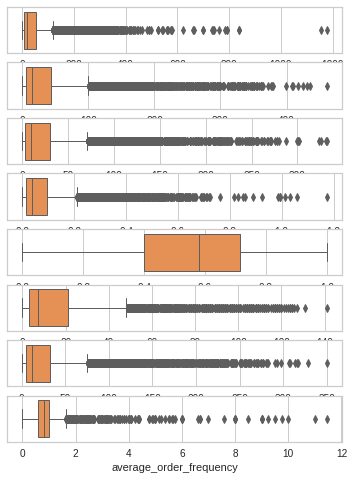

In [ ]:
# kiểm tra các thuộc tính numeric có outlier không
# 'fulfill', 'gsv_excluded_vat', 'FR','active','total_user', 'average_order_frequency'
num = ['requested','accepted','fulfill', 'gsv', 'FR','active','total_user', 'average_order_frequency']

plt.figure(figsize= (6,8))
for i in range(len(num)):
  plt.subplot(len(num),1,i+1)
  sns.boxplot(df[num[i]],palette="Oranges",linewidth=1)
plt.show()
# plt.ion()

Ta thấy thuộc tính numeric đều có outliers, nên về sau khi làm scaling thì sẽ chọn robust scaling

In [ ]:
# hàm tính tổng outliers của các thuộc tính
def findoutliers(df_frame,attr):
  num_outliers = 0
  num_outliers = df_frame[df_frame[attr] > (np.percentile(df_frame[attr],75) 
                                            + 1.5*scipy.stats.iqr(df_frame[attr]))].shape[0] # upper bound = q3 + (1.5*iqr)

  num_outliers += df_frame[df_frame[attr] < (np.percentile(df_frame[attr],25)
                                             - 1.5*scipy.stats.iqr(df_frame[attr]))].shape[0] # lower bound = q1 - (1.5*iqr)
  return num_outliers

In [ ]:
# tìm outlier của các thuộc tính
total_outliers = 0 
for item in num:
  n = findoutliers(df,item)
  print('Tổng số outliers của thuộc tính %s là: %d' %(item,n))
  total_outliers += n
print('Tổng số outliers là',total_outliers)

Tổng số outliers của thuộc tính requested là: 884
Tổng số outliers của thuộc tính accepted là: 868
Tổng số outliers của thuộc tính fulfill là: 926
Tổng số outliers của thuộc tính gsv là: 825
Tổng số outliers của thuộc tính FR là: 0
Tổng số outliers của thuộc tính active là: 749
Tổng số outliers của thuộc tính total_user là: 905
Tổng số outliers của thuộc tính average_order_frequency là: 252
Tổng số outliers là 5409


## Phân tích đa biến

**Phân tích giữa các biến liên tục và 'requested'**

In [ ]:
# Xem tương quan
corr_matr = df.corr(
plt.figure(figsize=(20,10))
g = sns.heatmap(corr_matr, cmap = 'RdYlGn', annot =True)
plt.show()

SyntaxError: ignored


*   Có thể thấy các biến như accepted, fulfill, gsv, active, total_user đều tương quan ảnh hưởng mạnh đến 'requested'. 
*   Xét về bản chất thì accepted, fulfill đều mang tính chất đo lường dựa trên số đơn như 'requested'.
*   FR lại tương quan nghịch với 'requested'. Bởi vì sẽ có những khu vực, quận ít đơn nhưng FR cao, hoặc thấp, và ngược lại
*   Lựa chọn GSV, active xem xét để xây dựng mô hình dự báo về sau.





In [ ]:
# xem qua các dịch vụ ở SGN
print('Tổng các dịch vụ ở SGN trong bộ dữ liệu',len(df['service_id'].unique()))
df['service_id'].unique()

Tổng các dịch vụ ở SGN trong bộ dữ liệu 6


array(['SGN-TRICYCLE', 'SGN-TRUCK-1000', 'SGN-TRUCK-2000',
       'SGN-TRUCK-500', 'SGN-VAN-1000', 'SGN-VAN-500'], dtype=object)

In [ ]:
# xem qua các khu vực quận huyện ở SGN
print('Tổng các quận huuyện ở SGN trong bộ dữ liệu',len(df['district'].unique()))
df['district'].unique()

Tổng các quận huuyện ở SGN trong bộ dữ liệu 24


array(['Quận 5', 'Quận 2', 'Quận 7', 'Quận Tân Bình', 'Quận 8',
       'Quận Thủ Đức', 'Quận Bình Thạnh', 'Quận 4', 'Quận Tân Phú',
       'Huyện Bình Chánh', 'Quận 12', 'Quận 10', 'Huyện Hóc Môn',
       'Quận Gò Vấp', 'Quận 11', 'Quận Bình Tân', 'Quận 1',
       'Quận Phú Nhuận', 'Quận 6', 'Huyện Củ Chi', 'Quận 9', 'Quận 3',
       'Huyện Nhà Bè', 'Huyện Cần Giờ'], dtype=object)

In [ ]:
# Tạo thêm cột Month 
df['month'] = pd.DatetimeIndex(df['period']).month

# Tạo thêm cột cps
df['cps'] = df['gsv'] / df['fulfill']


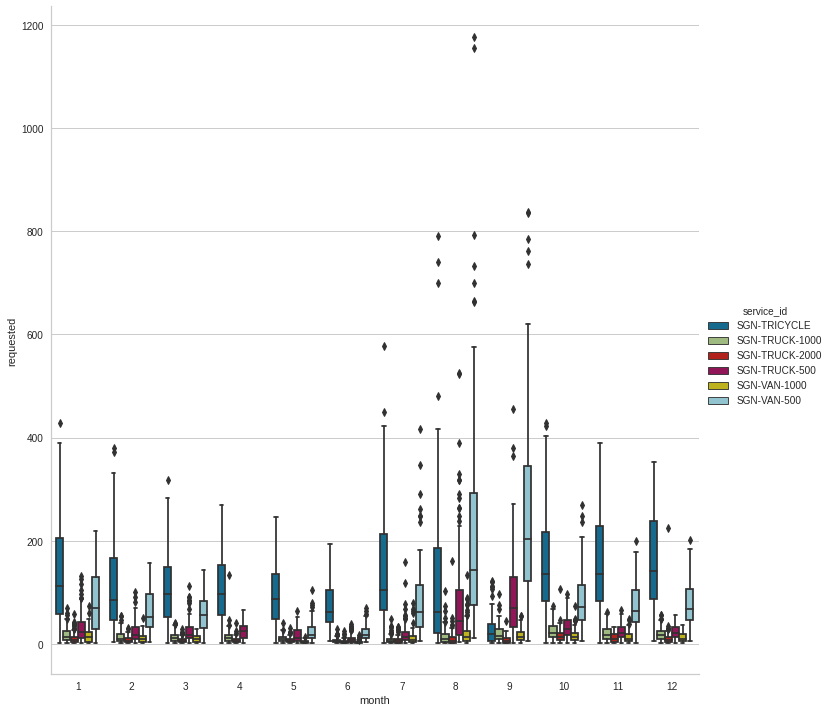

In [ ]:
# Xem xét sự biến thiên nhu cầu của các loại dịch vụ theo tháng
g = sns.factorplot('month', 'requested', data = df, hue = 'service_id', 
                   kind = 'box', size =10, aspect =1.0)


*   Nhu cầu có sự thay đổi theo tháng
*   Nhìn chung nhu cầu KH chủ yếu ở 2 dịch vụ tricycle và van 500
*   Những tháng cuối của năm 2021, nhu cầu tăng mạnh đều.
*   Những tháng đầu năm 2022, cụ thể t2 t3 nhu cầu có xu hướng giảm.





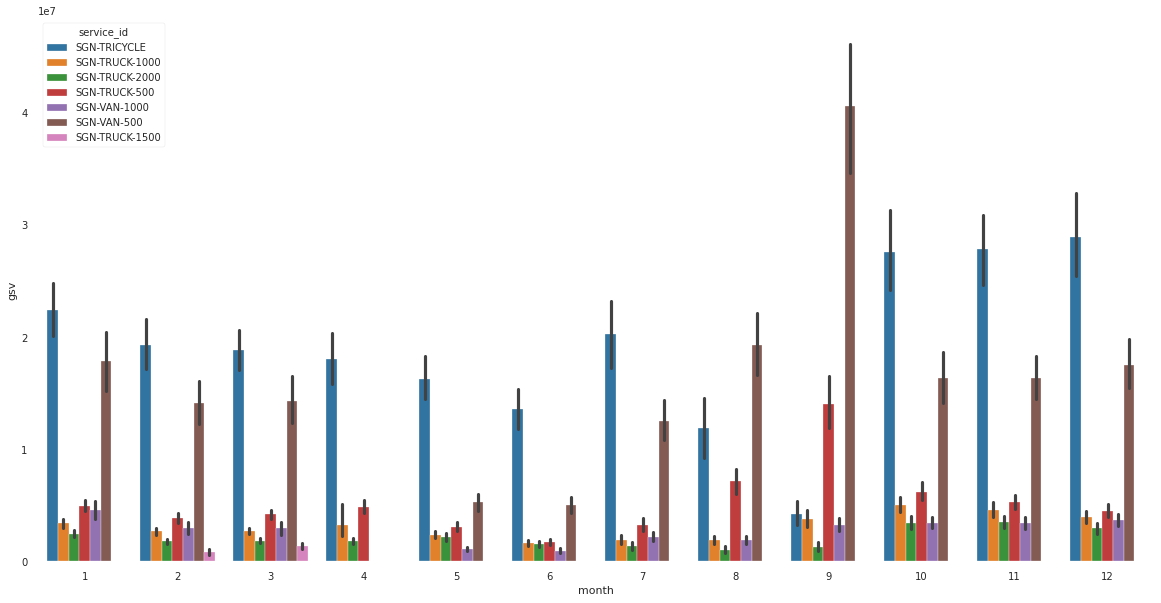

In [ ]:
# xem xét biến thiên doanh thu theo tháng
plt.figure(figsize =(20,10))
sns.barplot(data=df, x='month', y = 'gsv', hue='service_id')


*   Doanh thu của dịch vụ tricycle cao nhất và cao hơn so với Van, trừ tháng 9 là TH đặc biệt
*   Nhìn chung nhu cầu vs doanh thu khá tỉ lệ với nhau.
*   Nhu cầu và doanh thu thường cao ở nửa cuối năm.





Text(0.5, 1.0, 'Số đơn ở các dịch vụ theo thời gian')

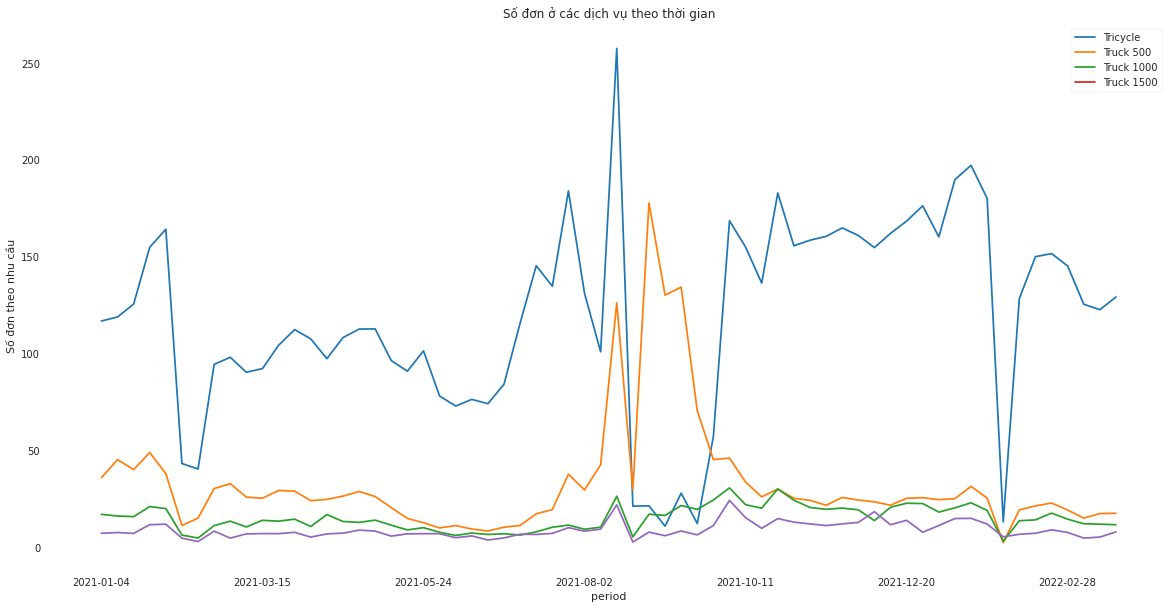

In [ ]:
# xem xét biến động nhu cầu qua toàn bộ dữ liệu
groupDate_tri=df[df["service_id"]=="SGN-TRICYCLE"].groupby('period').mean()
groupDate_van500=df[df["service_id"]=="SGN-VAN-500"].groupby('period').mean()
groupDate_van1000=df[df["service_id"]=="SGN-VAN-1000"].groupby('period').mean()
groupDate_truck500=df[df["service_id"]=="SGN-TRUCK-500"].groupby('period').mean()
groupDate_truck1000=df[df["service_id"]=="SGN-TRUCK-1000"].groupby('period').mean()
groupDate_truck1500=df[df["service_id"]=="SGN-TRUCK-1500"].groupby('period').mean()
groupDate_truck2000=df[df["service_id"]=="SGN-TRUCK-2000"].groupby('period').mean()

plt.figure(figsize=(20,10))
groupDate_tri['requested'].plot()
# groupDate_van500['requested'].plot()
# groupDate_van1000['requested'].plot()
groupDate_truck500['requested'].plot()
groupDate_truck1000['requested'].plot()
groupDate_truck1500['requested'].plot()
groupDate_truck2000['requested'].plot()


plt.ylabel('Số đơn theo nhu cầu')
plt.legend(['Tricycle','Truck 500','Truck 1000','Truck 1500'])
plt.title('Số đơn ở các dịch vụ theo thời gian')

Text(0.5, 1.0, 'Số đơn ở các dịch vụ theo thời gian')

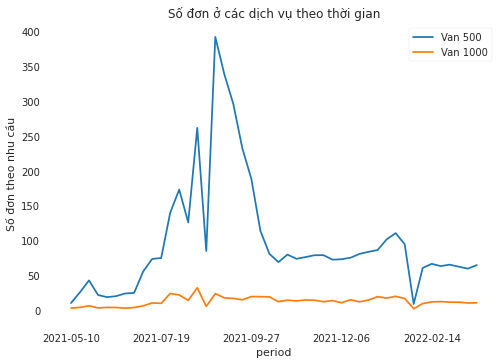

In [ ]:
groupDate_van500['requested'].plot()
groupDate_van1000['requested'].plot()
plt.ylabel('Số đơn theo nhu cầu')
plt.legend(['Van 500','Van 1000'])
plt.title('Số đơn ở các dịch vụ theo thời gian')

Các dịch vụ như Tricycle, Van 500, Truck 500 có nhu cầu thay đổi theo chu kỳ ở các tháng, và tăng giảm bất thường.
Các dịch vụ còn lại TRuck 1000, Truck 1500, Truck 2000 tương đối đều theo thời gian.


Text(0.5, 1.0, 'GSV for Truck 1000 service')

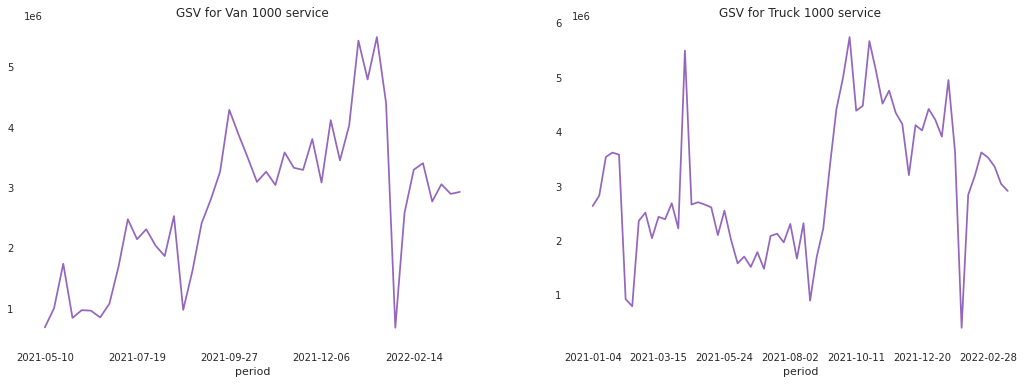

In [ ]:
# Xem xét biến động doanh thu của các loại dịch vụ thời gian của dữ liệu

plt.figure(figsize=(18,20))
plt.subplot(3,2,1)
groupDate_tri['gsv'].plot(color ='tab:purple')
plt.title('GSV for Tricylce service')

plt.subplot(3,2,2)
groupDate_van500['gsv'].plot(color ='tab:purple')
plt.title('GSV for Van 500 service')

plt.subplot(3,2,1)
groupDate_van1000['gsv'].plot(color ='tab:purple')
plt.title('GSV for Van 1000 service')

plt.subplot(3,2,2)
groupDate_truck500['gsv'].plot(color ='tab:purple')
plt.title('GSV for Truck 500 service')

plt.subplot(3,2,2)
groupDate_truck1000['gsv'].plot(color ='tab:purple')
plt.title('GSV for Truck 1000 service')


plt.subplot(3,2,6)
groupDate_truck2000['gsv'].plot(color ='tab:purple')
plt.title('GSV for Truck 2000 service')


plt.subplot(3,2,7)
groupDate_truck2000['gsv_excluded_vat'].plot()
plt.title('GSV for Truck 2000 service')

Tương tự như 'nhu cầu', 

In [ ]:
import plotly.graph_objects as go
# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=gsv.index, values=gsv['gsv'], hole=.2)])
fig.show()

NameError: ignored

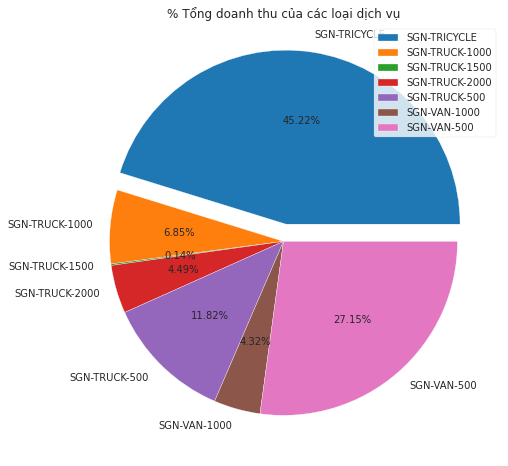

In [ ]:
# Vẽ pie chart cho Tổng nhu cầu của các loại dịch vụ
plt.figure(figsize=(8,8))
explode = (0.1, 0, 0, 0,0,0,0)
gsv = df.groupby("service_id").agg({"gsv":"sum"})
plt.pie(gsv["gsv"], labels = gsv.index, autopct='%1.2f%%',explode=explode)
plt.title("% Tổng doanh thu của các loại dịch vụ")
plt.legend()
plt.show() 

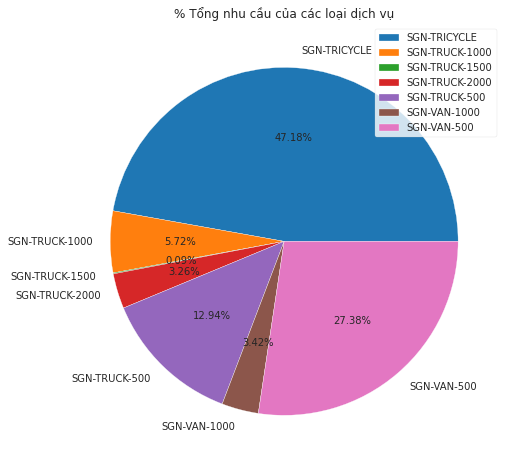

In [ ]:
# Vẽ pie chart cho tổng doanh thu
plt.figure(figsize=(8,8))
volume = df.groupby("service_id").agg({"requested":"sum"})
plt.pie(volume["requested"], labels = volume.index, autopct='%1.2f%%')
plt.title("% Tổng nhu cầu của các loại dịch vụ")
plt.legend()
plt.show() 

Xét về demand và doanh thu thì Tricycle vẫn là dịch vụ được chọn sử dụng nhiều và mang lại doanh thu nhiều nhất.


# Phân tích mỗi quan hệ giữa các biến phân loại


In [ ]:
df.head()

period city cate    service_id       district  requested  accepted  \
0  2021-01-04  SGN  SME  SGN-TRICYCLE         Quận 5         86        84   
1  2021-01-04  SGN  SME  SGN-TRICYCLE         Quận 2         98        62   
2  2021-01-04  SGN  SME  SGN-TRICYCLE         Quận 7        135       106   
3  2021-01-04  SGN  SME  SGN-TRICYCLE  Quận Tân Bình        305       290   
4  2021-01-04  SGN  SME  SGN-TRICYCLE         Quận 8         71        51   

   fulfill  gsv_excluded_vat   FR  active  total_user  \
0       56          13688235 0.65      34          59   
1       37          10822549 0.38      28          62   
2       72          22173529 0.53      38          95   
3      171          44098039 0.56      87         187   
4       26           7346078 0.37      24          42   

   average_order_frequency  month       cps  
0                     0.95      1 244432.77  
1                     0.60      1 292501.32  
2                     0.76      1 307965.68  
3                     0.91      1 257883.27  
4                     0.62      1 282541.46

In [ ]:
cat_list = ['period', 'service_id', 'district', 'month']
prob = 0.95
alpha = 1 - prob

for i in range(0, len(cat_list)-1):
    for j in range(i+1, len(cat_list)):
        
        two_way_table = pd.crosstab(df[cat_list[i]], df[cat_list[j]])        
        stat, p, dof, expected = chi2_contingency(two_way_table)        
        critical = chi2.ppf(prob, dof)
        
        if p <= alpha:
            print('Phân tích %s và %s:' %(cat_list[i], cat_list[j]))
            print('probability=%.3f, critical=%.3f, stat=%.3f, alpha=%.3f, p-value=%.3f' %(prob, critical, stat, alpha,p))
            print('%.3f <= %.3f -> Hai biến %s và %s phụ thuộc (Reject H0)' %(p, alpha, cat_list[i], cat_list[j]))  

Phân tích period và service_id:
probability=0.950, critical=357.391, stat=747.264, alpha=0.050, p-value=0.000
0.000 <= 0.050 -> Hai biến period và service_id phụ thuộc (Reject H0)
Phân tích period và month:
probability=0.950, critical=755.352, stat=83512.000, alpha=0.050, p-value=0.000
0.000 <= 0.050 -> Hai biến period và month phụ thuộc (Reject H0)
Phân tích service_id và month:
probability=0.950, critical=73.311, stat=311.230, alpha=0.050, p-value=0.000
0.000 <= 0.050 -> Hai biến service_id và month phụ thuộc (Reject H0)


* ta thấy biến 'period' và 'month' phụ thuộc nhau, cho nên sẽ bỏ bớt trong quá trình xây dựng model về sau
* Hai biến 'service_id' và 'district' độc lập nhau



# Phân tích mối quan giữa các biến phân loại và 'Requested'




Như phần tích ở trên, ta thấy lượng đơn theo nhu cầu có biến động theo thời gian. Vì vậy ta có thể phân tích liệu nhu cầu có thay đổi theo các mùa trong năm không.


# Tạo thêm cột 'season'
*  spring months are (1,2,3)
*  summer months are (4,5,6)
*  autumn months are (7,8,9)
*  winter months are (10,11,12)


In [ ]:
def convert_month(month):
    if month == 1 or month == 2 or month == 3:
        return 0
    elif month == 4 or month == 5 or month == 6:
        return 1
    elif month == 7 or month == 8 or month == 9:
        return 2
    else:
        return 3

In [ ]:
#Tạo thêm côt 'season'
df['season'] = df['month'].apply(lambda x: convert_month(x))

In [ ]:
df.head()

period city cate    service_id       district  requested  accepted  \
0  2021-01-04  SGN  SME  SGN-TRICYCLE         Quận 5         86        84   
1  2021-01-04  SGN  SME  SGN-TRICYCLE         Quận 2         98        62   
2  2021-01-04  SGN  SME  SGN-TRICYCLE         Quận 7        135       106   
3  2021-01-04  SGN  SME  SGN-TRICYCLE  Quận Tân Bình        305       290   
4  2021-01-04  SGN  SME  SGN-TRICYCLE         Quận 8         71        51   

   fulfill  gsv_excluded_vat   FR  active  total_user  \
0       56          13688235 0.65      34          59   
1       37          10822549 0.38      28          62   
2       72          22173529 0.53      38          95   
3      171          44098039 0.56      87         187   
4       26           7346078 0.37      24          42   

   average_order_frequency  month       cps  season  
0                     0.95      1 244432.77       0  
1                     0.60      1 292501.32       0  
2                     0.76      1 307965.68       0  
3                     0.91      1 257883.27       0  
4                     0.62      1 282541.46       0

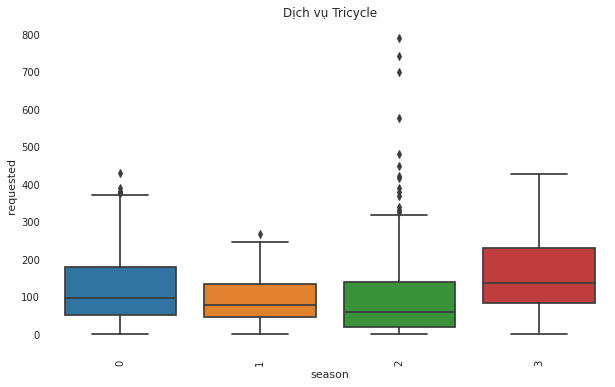

In [ ]:
#Thuộc tính 'season' có ảnh hưởng đến nhu cầu sử dụng dịch vụ tricycle không
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data=df[df['service_id']=='SGN-TRICYCLE'],
           x='season', y='requested', ax=ax)
plt.xticks(rotation=90)
plt.title("Dịch vụ Tricycle")
plt.show()
#plt.ion()

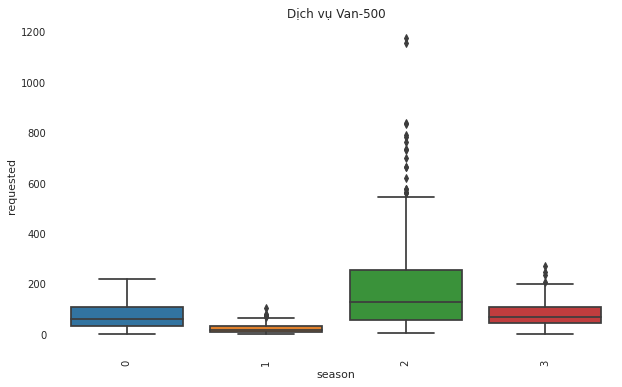

In [ ]:
#Thuộc tính 'season' có ảnh hưởng đến nhu cầu sử dụng dịch vụ van 500 không
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data=df[df['service_id']=='SGN-VAN-500'],
           x='season', y='requested', ax=ax)
plt.xticks(rotation=90)
plt.title("Dịch vụ Van-500")
plt.show()

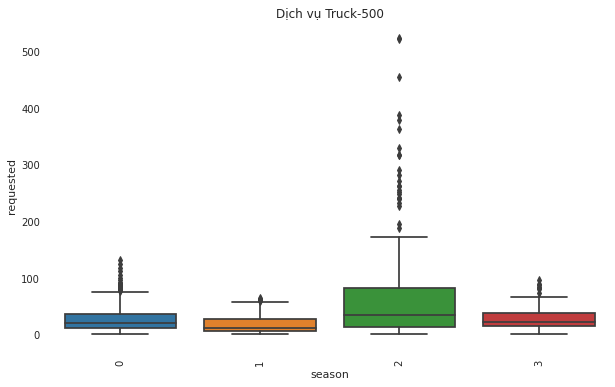

In [ ]:
#Thuộc tính 'season' có ảnh hưởng đến nhu cầu sử dụng dịch vụ truck 500 không
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data=df[df['service_id']=='SGN-TRUCK-500'],
           x='season', y='requested', ax=ax)
plt.xticks(rotation=90)
plt.title("Dịch vụ Truck-500")
plt.show()

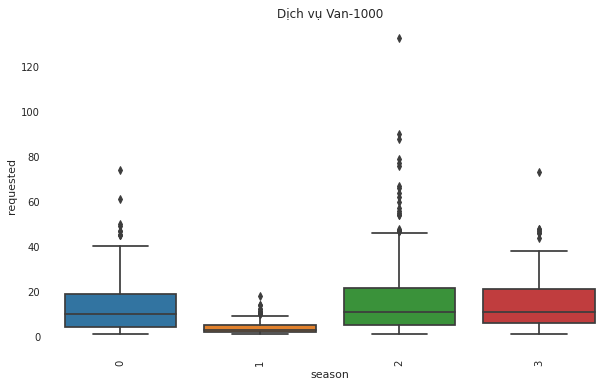

In [ ]:
#Thuộc tính 'season' có ảnh hưởng đến nhu cầu sử dụng dịch vụ van 1000 không
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data=df[df['service_id']=='SGN-VAN-1000'],
           x='season', y='requested', ax=ax)
plt.xticks(rotation=90)
plt.title("Dịch vụ Van-1000")
plt.show()

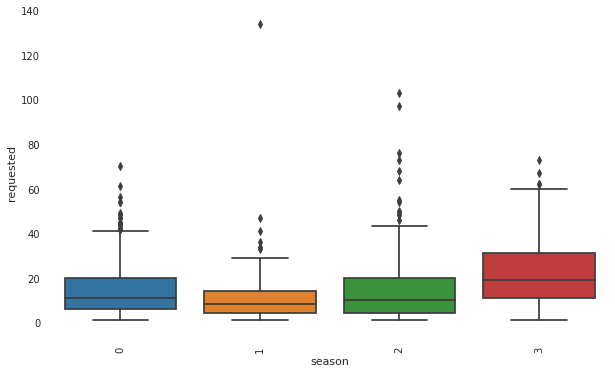

In [ ]:
#Thuộc tính 'season' có ảnh hưởng đến nhu cầu sử dụng dịch vụ truck 1000 không
#type == 'conventional'
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data=df[df['service_id']=='SGN-TRUCK-1000'],
           x='season', y='requested', ax=ax)
plt.xticks(rotation=90)
plt.show()

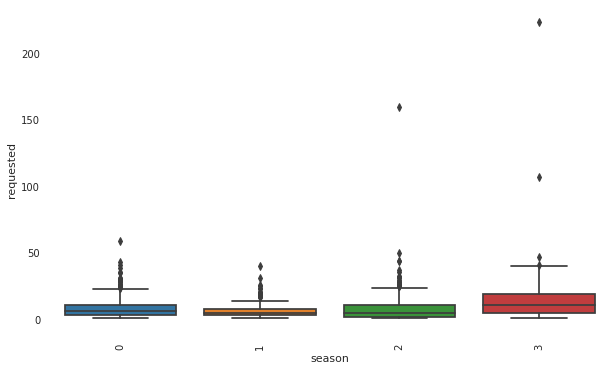

In [ ]:
#Thuộc tính 'season' có ảnh hưởng đến nhu cầu sử dụng dịch vụ truck 2000 không
#type == 'conventional'
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data=df[df['service_id']=='SGN-TRUCK-2000'],
           x='season', y='requested', ax=ax)
plt.xticks(rotation=90)
plt.show()

* Nhận xét: yếu tố mùa có ảnh hưởng đến các dịch vụ có nhu cầu cao như tricycle, van 500, và truck 500. Còn những dvu còn lại ảnh hưởng ko đáng kể. Nhưng về tổng quan 3 dvu kể trên chiếm lượng demand khá lớn vì thế trong xây dựng model sẽ đưa them biến theo mùa vào.

In [ ]:
df2 = df[df.service_id.isin(['SGN-TRICYCLE','SGN-VAN-500'])]
df3 = df[df.service_id.isin(['SGN-TRUCK-500','SGN-TRUCK-1000'])]

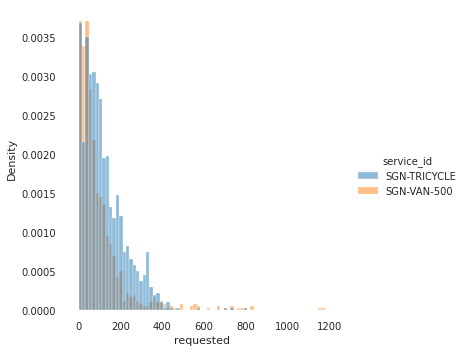

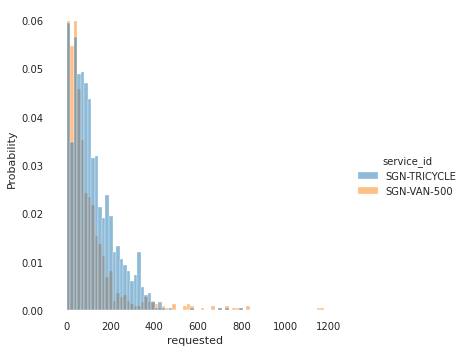

In [ ]:
#Thuộc tính 'service_id' có ảnh hưởng lên 'requested' hay không
# fig,(ax1,ax2) = plt.subplots(1,2)

sns.displot(df2, x='requested', hue='service_id', stat='density',ax=ax1)
sns.displot(df2, x='requested', hue='service_id', stat='probability',ax=ax2)


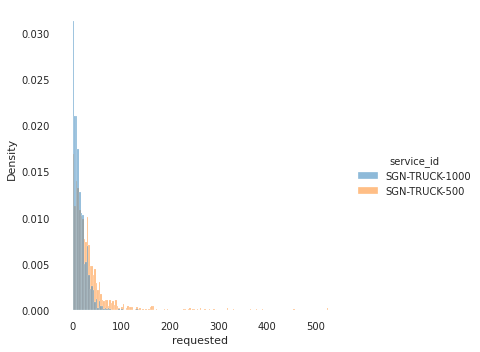

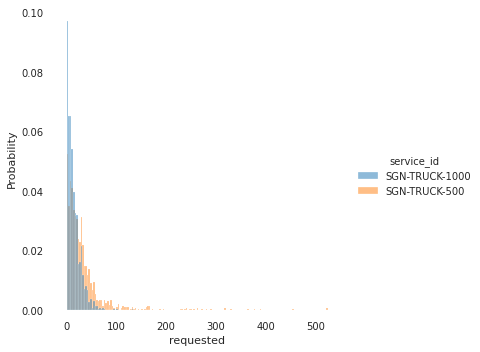

In [ ]:
sns.displot(df3, x='requested', hue='service_id', stat='density',ax=ax1)
sns.displot(df3, x='requested', hue='service_id', stat='probability',ax=ax2)

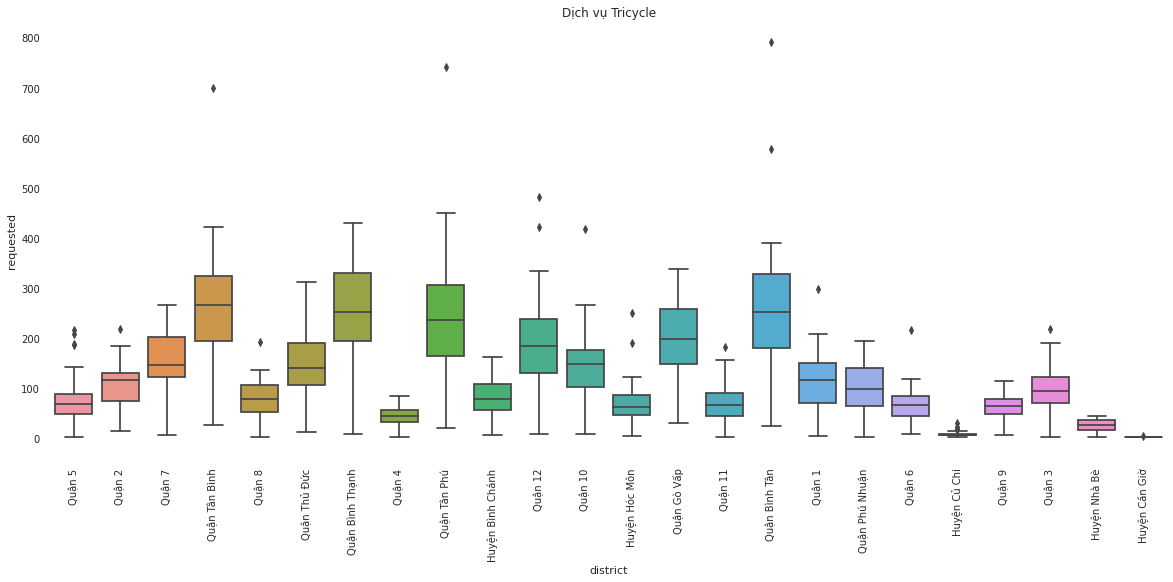

In [ ]:
#Thuộc tính 'district' có ảnh hưởng đến 'requested' dịch vụ không
#type = tricycle
fig, ax = plt.subplots(figsize=(20,8))
sns.boxplot(data=df[df['service_id']=='SGN-TRICYCLE'],
           x='district', y='requested', ax=ax)
plt.xticks(rotation=90)
plt.title('Dịch vụ Tricycle')
plt.show()

khu vực quận Tân Bình, Bình Thạnh, Bình Tân, Tân Phú có lượng đơn cao nhất đối với dịch vụ xe ba gác

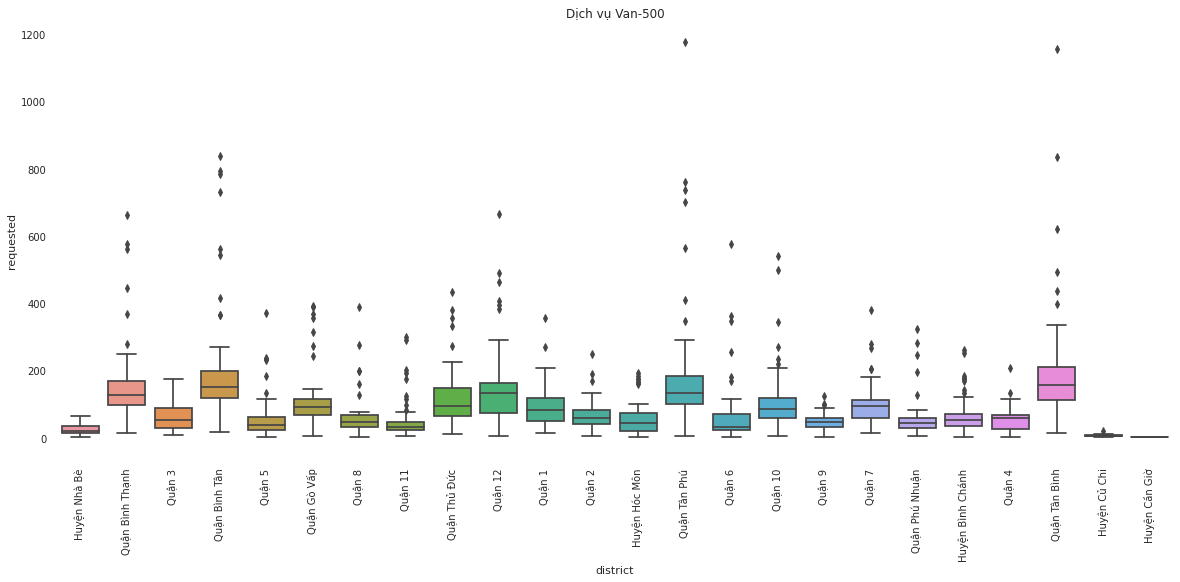

In [ ]:
# xe van 500
fig, ax = plt.subplots(figsize=(20,8))
sns.boxplot(data=df[df['service_id']=='SGN-VAN-500'],
           x='district', y='requested', ax=ax)
plt.xticks(rotation=90)
plt.title('Dịch vụ Van-500')
plt.show()

* Nhận xét: demand cao ở các quận Bình Thạnh, Bình Tân, Thủ Đức, Tân phú, Tân Bình.

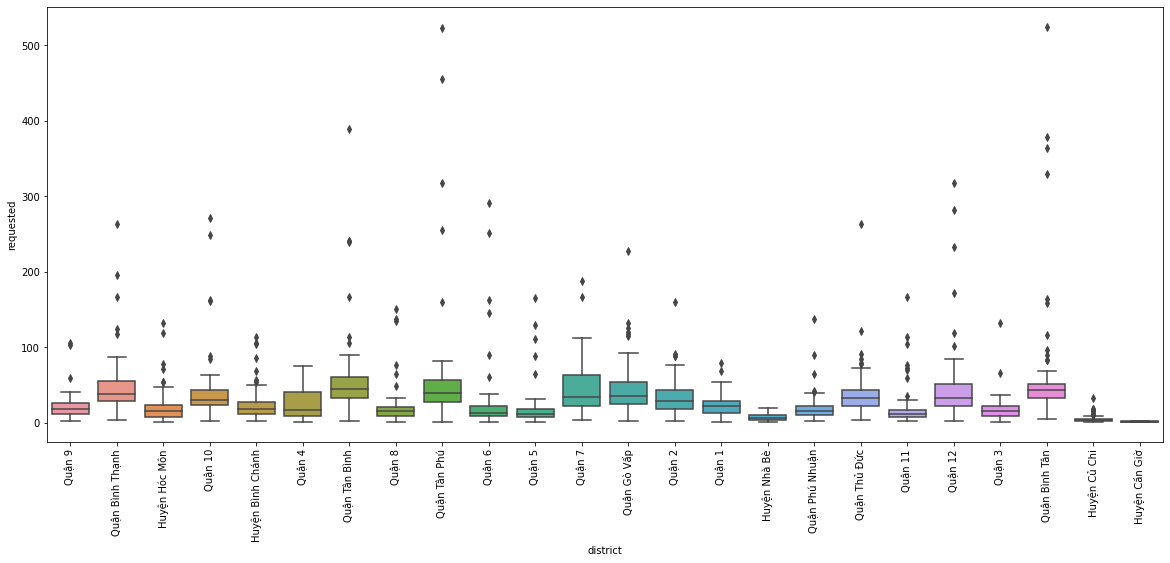

In [ ]:
# xe truck 500
fig, ax = plt.subplots(figsize=(20,8))
sns.boxplot(data=df[df['service_id']=='SGN-TRUCK-500'],
           x='district', y='requested', ax=ax)
plt.xticks(rotation=90)
plt.show()

* Nhận xét: cao ở các khu vực quân 4, quận 7, Tân Bình, Tân Phú.

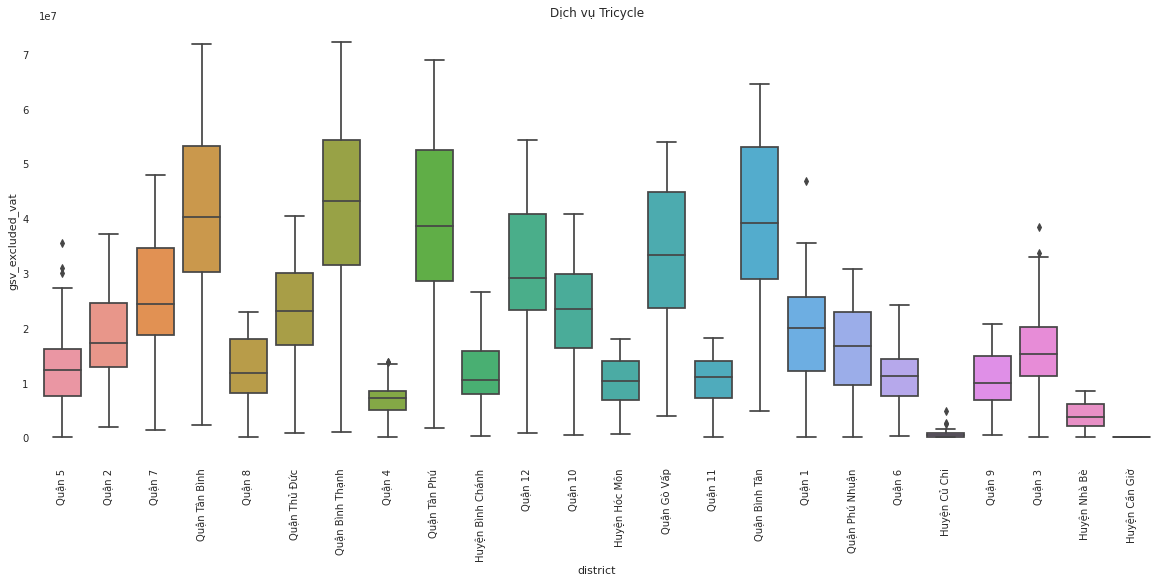

In [ ]:
#Thuộc tính 'district' có ảnh hưởng đến 'gsv'  không
#type = 'Tricyle'
fig, ax = plt.subplots(figsize=(20,8))
sns.boxplot(data=df[df['service_id']=='SGN-TRICYCLE'],
           x='district', y='gsv_excluded_vat', ax=ax)
plt.xticks(rotation=90)
plt.title('Dịch vụ Tricycle')
plt.show()

* Nhận xét: Tân bình, Bình Thạnh, Tân Phú, Bình Tân là những khu vực có gsv cao, tương đương với việc demand cao dẫn đến gsv cao

*   Thấp nhất là Quận 4, Củ Chi, Cần Giờ, Nhà Bè.





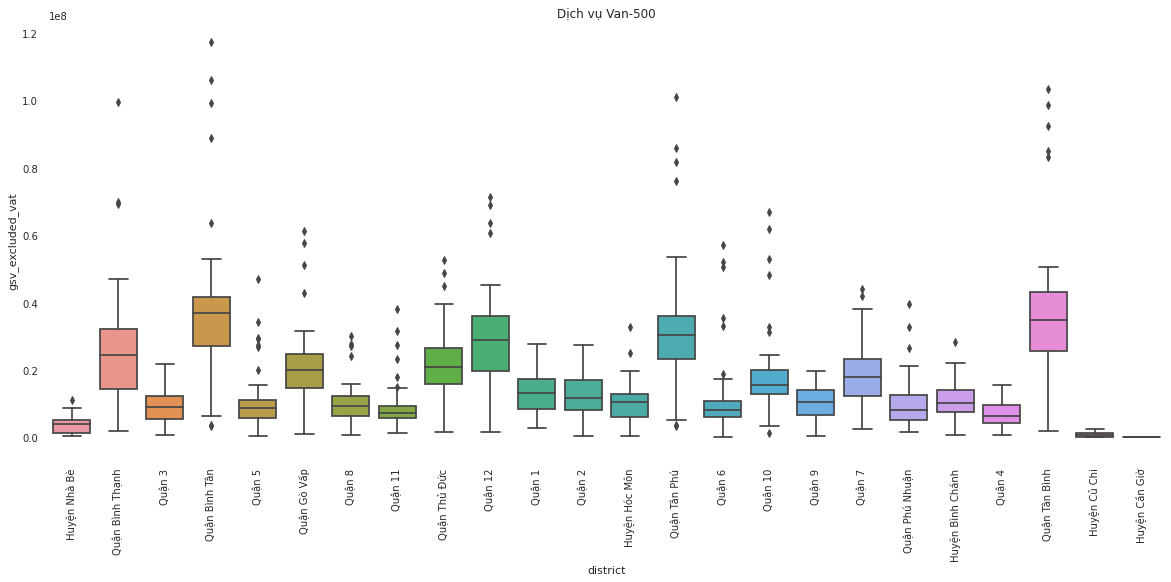

In [ ]:
#Thuộc tính 'district' có ảnh hưởng đến 'gsv'  không
#type = 'Van 500'
fig, ax = plt.subplots(figsize=(20,8))
sns.boxplot(data=df[df['service_id']=='SGN-VAN-500'],
           x='district', y='gsv_excluded_vat', ax=ax)
plt.xticks(rotation=90)
plt.title('Dịch vụ Van-500')
plt.show()

Khá tương đồng với Demand

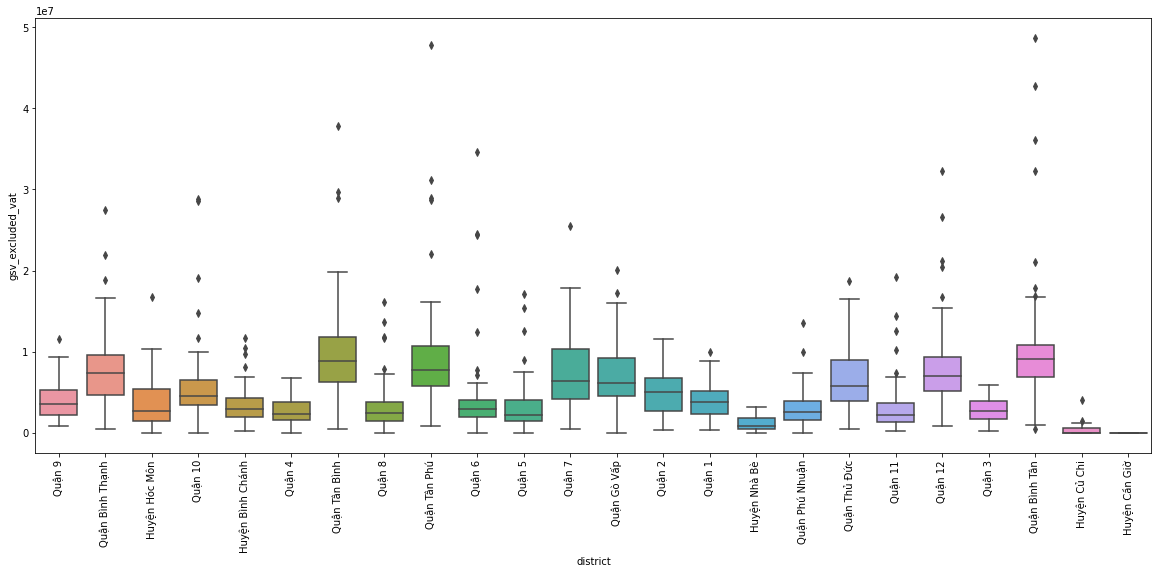

In [ ]:
#Thuộc tính 'district' có ảnh hưởng đến 'gsv'  không
#type = 'Truck 500'
fig, ax = plt.subplots(figsize=(20,8))
sns.boxplot(data=df[df['service_id']=='SGN-TRUCK-500'],
           x='district', y='gsv_excluded_vat', ax=ax)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Ta phân tích kỹ hơn bằng cách chọn ra top 10 khu vực có doanh thu và nhu cầu cao nhất
#để xem xét sự thay đổi qua các tháng
region_df = df.groupby("district").agg({"gsv_excluded_vat":'sum'})
region_df = region_df.sort_values('gsv_excluded_vat', ascending=False).reset_index()
top_10_region = region_df.head(10)['district'].tolist()
region_df_10 = df[df['district'].isin(top_10_region)]

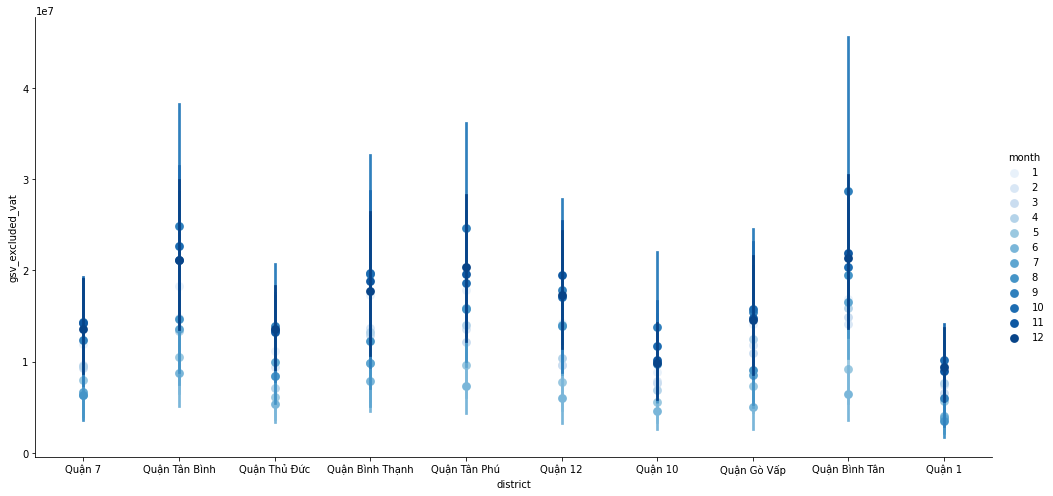

In [ ]:
g = sns.factorplot('district','gsv_excluded_vat',data=region_df_10,
                   hue='month',
                   size=7,
                   aspect=2,
                   palette='Blues',
                   join=False,
              )

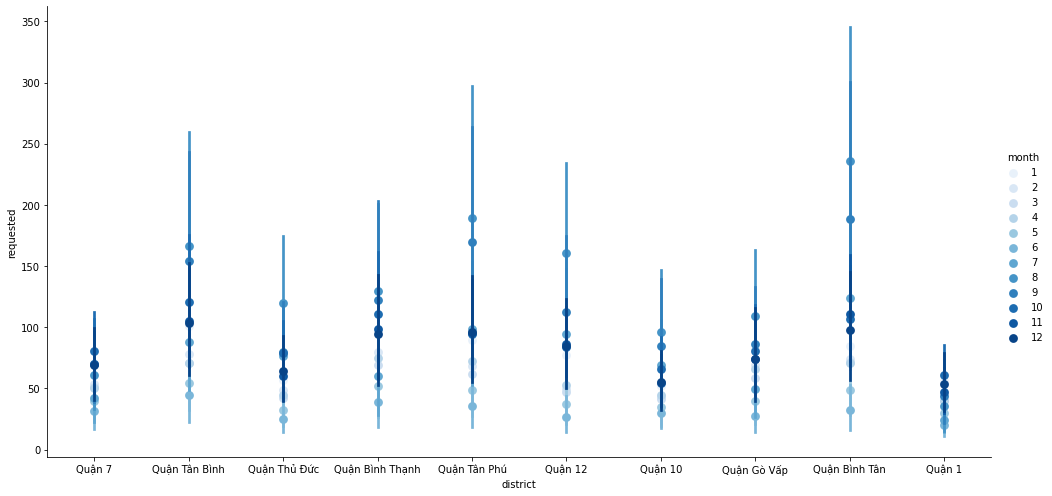

In [ ]:
g = sns.factorplot('district','requested',data=region_df_10,
                   hue='month',
                   size=7,
                   aspect=2,
                   palette='Blues',
                   join=False,
              )

* Nhận xét: 


1.   Từ 2 biểu đồ trên ta thấy top 5 khu vực có demand và gsv cao là: Tân Bình, Bình Thạnh, Tân Phú, Quận 12.
2.   Trong 5 khu vực này, điều thú vị là không phải có demand cao thì gsv sẽ cao và ngược lại. Điển hình là Tân phú có demand cao thứ 2 nhưng về mặt doanh thu chỉ đứng thứ 4. Trong khi đó Tân Bình thì ngc lại.
3. Vì vậy, khi xem xét khu vực tiềm năng, ta cần xét 2 yếu tố song song là demand và gsv. Vì để có được doanh thu, ta cần phải kiểm soát tốt được lượng demand nghĩa là phải hoàn thành đơn hàng từ KH, nếu khu vực đó có demand cao nhưng không có TX chạy đơn hay nhiều lý do khác để không đáp ứng đc thì cũng mặc dù có demand nhưng cũng ko có doanh thu.
4. Trong những khu vực trên thì có Tân Bình là tiềm năng. Nhưng khi vận hành sẽ có những quận 10, quận phú nhuận, quận 11, và Tân Phú.
5. Ngoài ra cần không chỉ các quận có trung tâm có demand cao và gsv cao thì cần phải kiểm soát và mở rộng phát triển. Với những khu vực ngoài thành nếu ta có thể xử lý tốt vẫn có thể đem lại nguồn doanh thu ổn định.



In [ ]:
# Ta phân tích kỹ hơn bằng cách chọn ra top 10 khu vực có doanh thu và nhu cầu cao nhất
#để xem xét sự thay đổi qua các tháng
region_df = df.groupby("district").agg({"gsv_excluded_vat":'sum'})
region_df = region_df.sort_values('gsv_excluded_vat', ascending=True).reset_index()
top_10_region = region_df.head(10)['district'].tolist()
region_df_10 = df[df['district'].isin(top_10_region)]

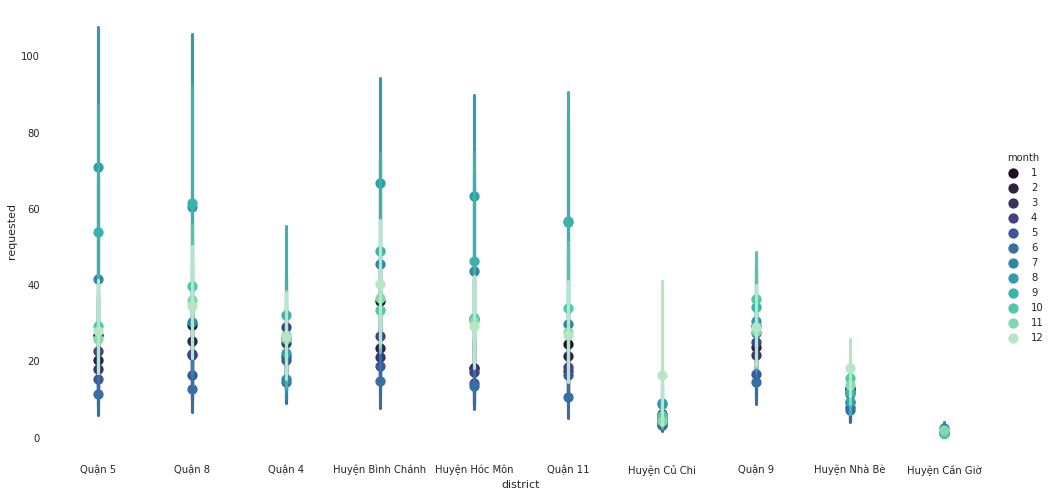

In [ ]:
g = sns.factorplot('district','requested',data=region_df_10,
                   hue='month',
                   size=7,
                   aspect=2,
                   palette='mako',
                   join=False,
              )

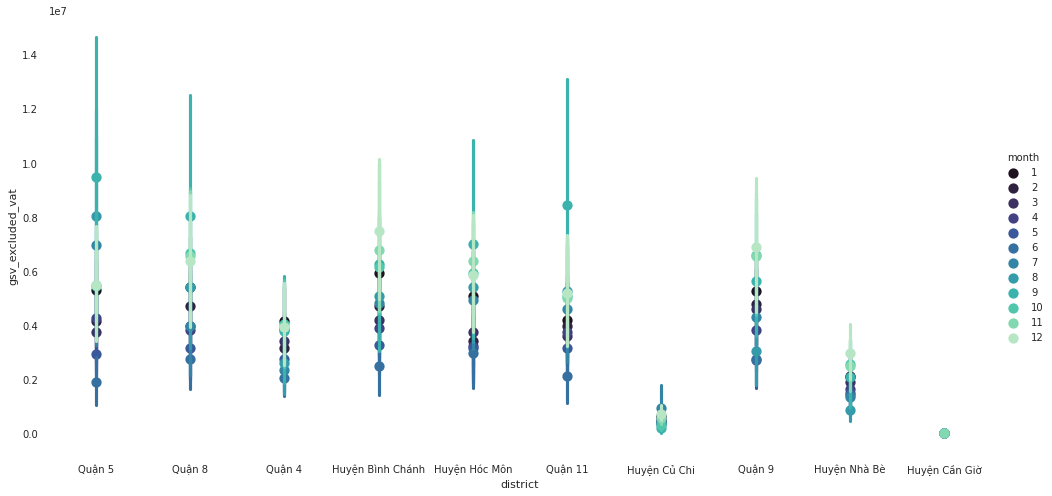

In [ ]:
g = sns.factorplot('district','gsv_excluded_vat',data=region_df_10,
                   hue='month',
                   size=7,
                   aspect=2,
                   palette='mako',
                   join=False,
              )

In [ ]:
# Chọn Bình Chánh, Hóc Môn, Nhà Bè, Cần giờ, Quận 7, Quận 8,

# **Xây dựng mô hình dự báo**

Dự báo nhu cầu -> Biến chính 'requested'
Dự trên phân tích thì các biến có ảnh hưởng và có quan hệ với 'requested' là fulfill, gsv_excluded_vat, district, service_id, month, season.

In [ ]:
df.tail()

period city cate   service_id         district  requested  accepted  \
7657  2022-03-21  SGN  SME  SGN-VAN-500    Huyện Hóc Môn         42        37   
7658  2022-03-21  SGN  SME  SGN-VAN-500          Quận 12         73        66   
7659  2022-03-21  SGN  SME  SGN-VAN-500  Quận Bình Thạnh        136       133   
7660  2022-03-21  SGN  SME  SGN-VAN-500           Quận 8         44        41   
7661  2022-03-21  SGN  SME  SGN-VAN-500   Quận Phú Nhuận         42        42   

      fulfill       gsv   FR  active  total_user  average_order_frequency  \
7657       29  11203148 0.69      22          28                     1.04   
7658       54  19822593 0.74      47          60                     0.90   
7659       94  24125185 0.69      53          76                     1.24   
7660       33   9189444 0.75      21          26                     1.27   
7661       32   9912593 0.76      22          37                     0.86   

      month       cps  season  
7657      3 386315.45       0  
7658      3 367085.06       0  
7659      3 256650.90       0  
7660      3 278468.00       0  
7661      3 309768.53       0

In [ ]:
df_tricycle = df[df.service_id.isin(['SGN-TRICYCLE','SGN-VAN-500'])]
df_tricycle = df_tricycle.reset_index()
del df_tricycle['index']

In [ ]:
df_final = df_tricycle[['gsv', 'district', 'requested','period','season','fulfill','active','service_id']]
df_final.tail()

gsv         district  requested      period  season  fulfill  \
2469  11203148    Huyện Hóc Môn         42  2022-03-21       0       29   
2470  19822593          Quận 12         73  2022-03-21       0       54   
2471  24125185  Quận Bình Thạnh        136  2022-03-21       0       94   
2472   9189444           Quận 8         44  2022-03-21       0       33   
2473   9912593   Quận Phú Nhuận         42  2022-03-21       0       32   

      active   service_id  
2469      22  SGN-VAN-500  
2470      47  SGN-VAN-500  
2471      53  SGN-VAN-500  
2472      21  SGN-VAN-500  
2473      22  SGN-VAN-500

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2474 entries, 0 to 2473
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   gsv         2474 non-null   int64 
 1   district    2474 non-null   object
 2   requested   2474 non-null   int64 
 3   period      2474 non-null   object
 4   season      2474 non-null   int64 
 5   fulfill     2474 non-null   int64 
 6   active      2474 non-null   int64 
 7   service_id  2474 non-null   object
dtypes: int64(5), object(3)
memory usage: 154.8+ KB


In [ ]:
df_final.describe()

gsv  requested  season  fulfill  active
count      2474.00    2474.00 2474.00  2474.00 2474.00
mean   18287001.32     111.51    1.36    65.96   37.21
std    15788691.73     109.68    1.19    58.00   26.99
min           0.00       1.00    0.00     0.00    0.00
25%     7152992.75      40.00    0.00    23.00   17.00
50%    13833240.50      80.00    1.00    49.00   32.00
75%    25987132.50     149.75    2.00    93.00   53.00
max   117377451.00    1177.00    3.00   332.00  141.00

In [ ]:
# Các biến input
X = df_final.drop('requested', axis =1)
X.head()

gsv       district      period  season  fulfill  active    service_id
0  13688235         Quận 5  2021-01-04       0       56      34  SGN-TRICYCLE
1  10822549         Quận 2  2021-01-04       0       37      28  SGN-TRICYCLE
2  22173529         Quận 7  2021-01-04       0       72      38  SGN-TRICYCLE
3  44098039  Quận Tân Bình  2021-01-04       0      171      87  SGN-TRICYCLE
4   7346078         Quận 8  2021-01-04       0       26      24  SGN-TRICYCLE

In [ ]:
# Biến target
y = df['requested']

# Xây dựng Pipeline

In [ ]:
# Xây dựng Pipeline
cat_names = X.select_dtypes('object').columns.tolist()
num_names = X.select_dtypes(['float','int']).columns.tolist()

In [ ]:
#Xây dựng pipeline cho thuộc tính phân loại -> One_hot
cat_pl = Pipeline(
    steps=[('onehot', OneHotEncoder(drop='first'))]
)
#Xây dựng pipeline cho thuộc tính liên tục - Sử dụng RobustScaler vì có outliers
num_pl = Pipeline(
    steps=[('scaler', RobustScaler())]
)

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pl, num_names), #áp dụng cho thuộc tính liên tục
        ('cat', cat_pl, cat_names), #áp dụng cho thuộc tính phân loại
    ]
)

In [ ]:
#Xây dựng hàm tìm giá trị K tối ưu cho thuật toán KNN Regression
def optimal_k(X_train, X_test, y_train, y_test):
    list_k =[]
    list_r_score =[]

    for K_value in range(2,11): 
      list_k.append(K_value)
      neigh = KNeighborsRegressor(n_neighbors=K_value)
      neigh.fit(X_train,y_train)
      score = neigh.score(X_test,y_test)*100
      list_r_score.append(score)
      print('The R^2 score is: ', score, ' for K-Value:',K_value)

    vi_tri = list_r_score.index(max(list_r_score))
    k = list_k[vi_tri]

    print('\nThe optimal number of neighbors is:', k, 'with R^2 score is:', list_r_score[vi_tri])
    return k

In [ ]:
# Xây dựng hàm tính độ chính xác train và test acc theo các mô hình sau: 
# LinearRegression, SVR, RandomForestRegressor, DecisionTreeRegressor
# KNeighborsRegressor, XGBRegressor, 
def compute_models(X_train, X_test, y_train, y_test, k):
    models = [
              LinearRegression(),
              SVR(),
              RandomForestRegressor(n_estimators=100),
              XGBRegressor(random_state=0),
              DecisionTreeRegressor(),
              KNeighborsRegressor(n_neighbors=k),



    ]
    CV = 5 # Số lần chạy cho từng thuật toán
    entries =[]
    #i=0
    for model in models:
      scores_train = []
      scores_test = []
      abs_scores = []
      times = []
      for i in range(CV):
        t1 = datetime.datetime.now()
        model_name = model.__class__.__name__
        model.fit(X_train,y_train)
        t2 = datetime.datetime.now()
        d = round((t2-t1).microseconds/1000,1) #chuyển sang miliseconds
        
        score_train = model.score(X_train,y_train)
        score_test = model.score(X_test,y_test)
        abs_score = abs(score_train - score_test)

        scores_train.append(score_train)
        scores_test.append(score_test)
        abs_scores.append(abs_score)
        times.append(d)


      print(model.__class__.__name__, scores_test)
      entries.append([model_name,np.array(scores_train).mean(),
                      np.array(scores_test).mean(),np.array(abs_scores).mean(),
                      np.array(times).mean()])

      #i = i+1
    cv_df = pd.DataFrame(entries,
                         columns=['model_name','score_train_mean',
                                   'score_test_mean','abs|score|','time_mean'])

    return cv_df

# **Trường hợp 1: Ta xây dựng mô hình dựa trên dữ liệu gốc, không xử lý outliers**

In [ ]:
# #Thực hiện encoding và scaling cho dữ liệu đầu vào - sử dụng pipeline 'preprocessor'
# encode_scaling = preprocessor.fit(X)
# processed_X = encode_scaling.transform(X)

In [ ]:
# #Chia bộ dữ liệu thành train, test theo tỉ lệ 70:30
# X_train, X_test, y_train, y_test = train_test_split(processed_X,y,
#                                                        test_size=0.3,
#                                                        random_state=0)

ValueError: ignored

In [ ]:
# #Tìm k tối ưu của KNN
# k = optimal_k(X_train, X_test, y_train, y_test)

The R^2 score is:  82.50809203036717  for K-Value: 2
The R^2 score is:  84.23656182667996  for K-Value: 3
The R^2 score is:  84.1476060166145  for K-Value: 4
The R^2 score is:  84.02284768674375  for K-Value: 5
The R^2 score is:  84.14710944108165  for K-Value: 6
The R^2 score is:  83.63694306714297  for K-Value: 7
The R^2 score is:  83.38644869830372  for K-Value: 8
The R^2 score is:  83.51591871703158  for K-Value: 9
The R^2 score is:  83.60883518382315  for K-Value: 10

The optimal number of neighbors is: 3 with R^2 score is: 84.23656182667996


In [ ]:
# #Tính toán và so sánh các thuật toán
# cv_df = compute_models(X_train, X_test, y_train, y_test, k)

LinearRegression [0.8228014252096401, 0.8228014252096401, 0.8228014252096401, 0.8228014252096401, 0.8228014252096401]
SVR [0.6157254986270271, 0.6157254986270271, 0.6157254986270271, 0.6157254986270271, 0.6157254986270271]
RandomForestRegressor [0.8657034992291817, 0.8591858383921058, 0.8614566809080505, 0.861994556345259, 0.8646212680277927]
[05:30:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:30:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:30:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:30:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:30:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor [0.8777

In [ ]:
# cv_df

model_name  score_train_mean  score_test_mean  abs|score|  \
0       LinearRegression              0.83             0.82        0.01   
1                    SVR              0.60             0.62        0.02   
2  RandomForestRegressor              0.98             0.86        0.12   
3           XGBRegressor              0.93             0.88        0.06   
4  DecisionTreeRegressor              1.00             0.76        0.24   
5    KNeighborsRegressor              0.92             0.84        0.08   

   time_mean  
0      20.98  
1     754.20  
2     779.66  
3     221.44  
4     128.98  
5       0.86

# Nhận xét:
* LinearRegression, SVR không bị overfitting nhưng R2 cho kết quả khá thấp.
* DecisionTreeRegression bị overfitting 
* RandomFR, XGB, KNN cho kết quả R2 tốt và tốt nhất là RandomForestRegression



# **Trường hợp 2: ta xử lý loại bỏ bớt outliers trước rồi xây dựng model**
ta tập trung xử lý outliers của 'requested' và 'gsv_excluded_vat

In [ ]:
#Tìm các outliers của 'requested' và 'gsv'
volume_outliers = df_final[df_final['requested'] > (np.percentile(df_final['requested'],75)+
                                           1.5*scipy.stats.iqr(df_final['requested']))]

gsv_outliers = df_final[df_final['gsv'] > (np.percentile(df_final['gsv'],75)+
                                          1.5*scipy.stats.iqr(df_final['gsv']))]

In [ ]:
#Gộp các index của outliers
outliers_list = volume_outliers.index.to_list() + gsv_outliers.index.to_list()
outliers_list.sort()
print(type(outliers_list))
print('Tổng số outliers là:', len(outliers_list))

<class 'list'>
Tổng số outliers là: 215


In [ ]:
#Xóa bỏ các outliers này đi
df_final1 = df_final.drop(outliers_list)
df_final1.reset_index(inplace=True)
df_final1.drop(['index'],axis=1, inplace=True)
df_final1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   gsv         2331 non-null   int64 
 1   district    2331 non-null   object
 2   requested   2331 non-null   int64 
 3   period      2331 non-null   object
 4   season      2331 non-null   int64 
 5   fulfill     2331 non-null   int64 
 6   active      2331 non-null   int64 
 7   service_id  2331 non-null   object
dtypes: int64(5), object(3)
memory usage: 145.8+ KB


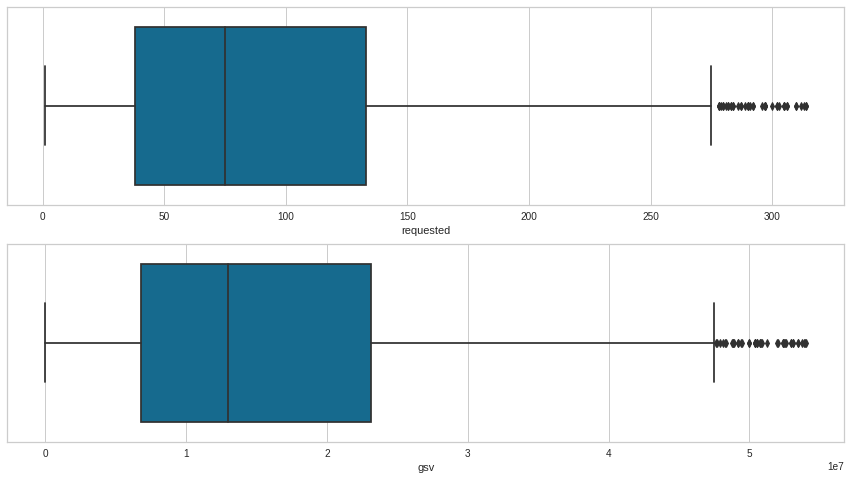

In [ ]:
#Trực quan hóa kiểm tra xem còn outliers trong 'Total Volume' và 'AveragePrice' hay không
plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
sns.boxplot(df_final1['requested'])
plt.subplot(2,1,2)
sns.boxplot(df_final1['gsv'])
plt.show()

In [ ]:
X = df_final1.drop('requested', axis=1)
y = df_final1['requested']

In [ ]:
#Thực hiện encoding và scaling cho dữ liệu đầu vào - sử dụng pipeline 'preprocessor'
encode_scaling = preprocessor.fit(X)
processed_X = encode_scaling.transform(X)

#Chia bộ dữ liệu thành train, test theo tỉ lệ 70:30
X_train, X_test, y_train, y_test = train_test_split(processed_X,y,
                                                       test_size=0.30, random_state=0)

In [ ]:
#Tìm k tối ưu của KNN
k = optimal_k(X_train, X_test, y_train, y_test)

The R^2 score is:  86.32488151758311  for K-Value: 2
The R^2 score is:  88.93079269444414  for K-Value: 3
The R^2 score is:  89.79291278551966  for K-Value: 4
The R^2 score is:  90.51348281027593  for K-Value: 5
The R^2 score is:  90.80778288624026  for K-Value: 6
The R^2 score is:  90.81472812793466  for K-Value: 7
The R^2 score is:  90.80382545540701  for K-Value: 8
The R^2 score is:  90.70503145792578  for K-Value: 9
The R^2 score is:  90.61229638623239  for K-Value: 10

The optimal number of neighbors is: 7 with R^2 score is: 90.81472812793466


In [ ]:
#Tính toán và so sánh các thuật toán
cv_df = compute_models(X_train, X_test, y_train, y_test, k)

LinearRegression [0.9222210694189528, 0.9222210694189528, 0.9222210694189528, 0.9222210694189528, 0.9222210694189528]
SVR [0.7127063105834058, 0.7127063105834058, 0.7127063105834058, 0.7127063105834058, 0.7127063105834058]
RandomForestRegressor [0.9153422071067329, 0.9163688914862589, 0.9147577522825405, 0.9126265548838999, 0.9160315805009476]
[08:37:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:37:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:37:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:37:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:37:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor [0.929

In [ ]:
cv_df

model_name  score_train_mean  score_test_mean  abs|score|  \
0       LinearRegression              0.94             0.92        0.01   
1                    SVR              0.73             0.71        0.02   
2  RandomForestRegressor              0.99             0.92        0.07   
3           XGBRegressor              0.96             0.93        0.04   
4  DecisionTreeRegressor              1.00             0.86        0.14   
5    KNeighborsRegressor              0.94             0.91        0.03   

   time_mean  
0      12.78  
1     192.58  
2     624.16  
3      93.80  
4      33.84  
5       0.60

Vẫn chọn RandomForestRegressor

In [ ]:
#Tìm số cây tối ưu cho RandomForest
list_trees =[30, 50, 70, 100, 150, 200, 250, 300, 350, 400, 450, 500]
list_r_score =[]

for tree in list_trees: 
  rd_forest = RandomForestRegressor(n_estimators=tree)
  rd_forest.fit(X_train,y_train)
  score = rd_forest.score(X_test,y_test)*100
  list_r_score.append(score)
  print('The R^2 score is: ', score, ' for tree number:', tree)

vi_tri = list_r_score.index(max(list_r_score))
optimal_tree = list_trees[vi_tri]

print('\nThe optimal number of trees is:', optimal_tree, 'with R^2 score is:', list_r_score[vi_tri])

The R^2 score is:  91.65068552302198  for tree number: 30
The R^2 score is:  91.66758603440512  for tree number: 50
The R^2 score is:  91.5104085745529  for tree number: 70
The R^2 score is:  91.4070330064442  for tree number: 100
The R^2 score is:  91.56911698170597  for tree number: 150
The R^2 score is:  91.50836036118044  for tree number: 200
The R^2 score is:  91.5798630283187  for tree number: 250
The R^2 score is:  91.49253568649213  for tree number: 300
The R^2 score is:  91.51246099135837  for tree number: 350
The R^2 score is:  91.61838566681273  for tree number: 400
The R^2 score is:  91.48718498443408  for tree number: 450
The R^2 score is:  91.48921425414215  for tree number: 500

The optimal number of trees is: 50 with R^2 score is: 91.66758603440512


In [ ]:
rd_forest_model = RandomForestRegressor(n_estimators=optimal_tree)
rd_forest_model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=50)

In [ ]:
print('Train score:', rd_forest_model.score(X_train,y_train)*100)
print('Test score:', rd_forest_model.score(X_test, y_test)*100)

Train score: 98.87161883545527
Test score: 91.22189828249816


In [ ]:
# Use the forest's predict method on the test data
y_pred = rd_forest_model.predict(X_test)
# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
mae = round(np.mean(errors),2)
print('Mean Absolute Error:', mae,'%')

Mean Absolute Error: 11.95 %


In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors /y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape) 
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 81.08 %.


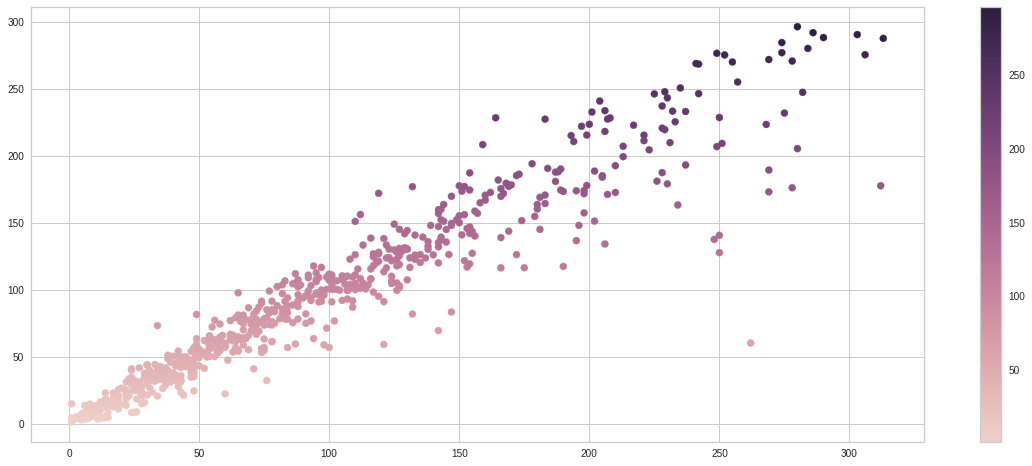

In [ ]:
# residual
>>> cmap = sns.cubehelix_palette(as_cmap=True)
>>> f, ax = plt.subplots(figsize=(20,8))
>>> points = ax.scatter(
y_test,y_pred, c=y_pred, s=50, cmap=cmap
 )
>>> f.colorbar(points)
>>> plt.show()

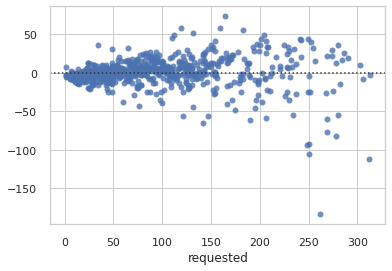

In [ ]:
sns.set_theme(style="whitegrid")
sns.residplot(x=y_test, y=y_pred,color="b")
plt.show()

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 11.95162857142857
Mean Squared Error: 441.1341891428572
Root Mean Squared Error: 21.0031947365837


model 2
# model 2

In [ ]:
#Khởi tạo model CatBoost
cb_model = CatBoostRegressor()
#Tạo bộ tham số
parameters = {'iterations': [100, 150, 200],
        'learning_rate': [0.001, 0.03, 0.1],
        'depth': [2, 4, 6, 8, 10],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]
        }

grid = GridSearchCV(estimator=cb_model, param_grid = parameters, cv = 2, n_jobs=-1)

In [ ]:
#Run model
grid.fit(X_train, y_train)    
# Results from Grid Search
print("\n The best estimator across ALL searched params:\n",
                          grid.best_estimator_)
print("\n The best score across ALL searched params:\n",
                          grid.best_score_)
print("\n The best parameters across ALL searched params:\n",
                          grid.best_params_)

0:	learn: 15.8669795	total: 1.16ms	remaining: 231ms
1:	learn: 14.8816373	total: 2.12ms	remaining: 210ms
2:	learn: 14.1149650	total: 3.02ms	remaining: 198ms
3:	learn: 13.3195001	total: 3.94ms	remaining: 193ms
4:	learn: 12.7196363	total: 4.85ms	remaining: 189ms
5:	learn: 12.1322387	total: 5.75ms	remaining: 186ms
6:	learn: 11.5411626	total: 6.66ms	remaining: 184ms
7:	learn: 11.0538802	total: 7.52ms	remaining: 180ms
8:	learn: 10.6252300	total: 8.39ms	remaining: 178ms
9:	learn: 10.2276274	total: 9.3ms	remaining: 177ms
10:	learn: 9.8271292	total: 10.2ms	remaining: 175ms
11:	learn: 9.4784355	total: 11.2ms	remaining: 176ms
12:	learn: 9.1345069	total: 12.3ms	remaining: 176ms
13:	learn: 8.8804597	total: 13.3ms	remaining: 176ms
14:	learn: 8.5955628	total: 14.3ms	remaining: 177ms
15:	learn: 8.3393405	total: 15.4ms	remaining: 177ms
16:	learn: 8.1864603	total: 16.6ms	remaining: 178ms
17:	learn: 7.9450821	total: 17.6ms	remaining: 178ms
18:	learn: 7.7613038	total: 18.6ms	remaining: 177ms
19:	learn: 7.

In [ ]:
#Tạo model với bộ tham số tối ưu
catboost_model = CatBoostRegressor(iterations=200, learning_rate=0.1,
                                   l2_leaf_reg=0.2, depth=10)
#Huấn luyện model
catboost_model.fit(X_train,y_train)

0:	learn: 15.5449085	total: 23.5ms	remaining: 4.67s
1:	learn: 14.4068694	total: 44.4ms	remaining: 4.4s
2:	learn: 13.3864429	total: 62.6ms	remaining: 4.11s
3:	learn: 12.4420001	total: 80ms	remaining: 3.92s
4:	learn: 11.5668520	total: 96.9ms	remaining: 3.78s
5:	learn: 10.8427134	total: 117ms	remaining: 3.8s
6:	learn: 10.1394061	total: 136ms	remaining: 3.76s
7:	learn: 9.4637668	total: 154ms	remaining: 3.71s
8:	learn: 8.8674353	total: 173ms	remaining: 3.67s
9:	learn: 8.3584285	total: 192ms	remaining: 3.64s
10:	learn: 7.8318232	total: 210ms	remaining: 3.6s
11:	learn: 7.3653832	total: 232ms	remaining: 3.63s
12:	learn: 6.9790339	total: 252ms	remaining: 3.62s
13:	learn: 6.5593256	total: 269ms	remaining: 3.57s
14:	learn: 6.2071952	total: 286ms	remaining: 3.52s
15:	learn: 5.9178067	total: 308ms	remaining: 3.54s
16:	learn: 5.6184577	total: 326ms	remaining: 3.51s
17:	learn: 5.3740194	total: 345ms	remaining: 3.49s
18:	learn: 5.1628003	total: 362ms	remaining: 3.45s
19:	learn: 4.9299346	total: 380ms	

In [ ]:
#Tính R score của catboost
y_pred = catboost_model.predict(X_test)
print('R_2 scores:', round(r2_score(y_test,y_pred)*100,2),'%')

R_2 scores: 93.01 %


In [ ]:
# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
mae = round(np.mean(errors),2)
print('Mean Absolute Error:', mae,'%')

Mean Absolute Error: 2.82 %


In [ ]:
mape = 100 * (errors /y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape) 
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 91.0 %.


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(mse)      

18.000852561063606


Text(0.5, 1.0, 'Request vs Predicted Request: $Y_i$ vs $\\hat{Y}_i$')

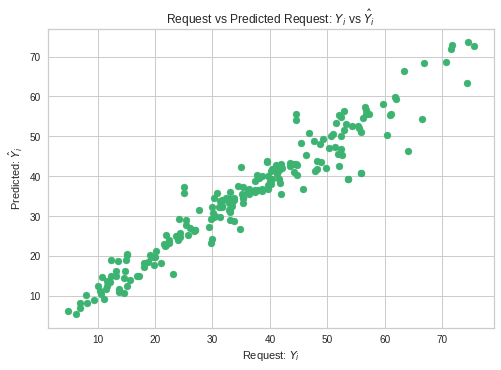

In [ ]:
plt.scatter(y_test, y_pred,color ='mediumseagreen')
plt.xlabel("Request: $Y_i$")
plt.ylabel("Predicted: $\hat{Y}_i$")
plt.title("Request vs Predicted Request: $Y_i$ vs $\hat{Y}_i$")

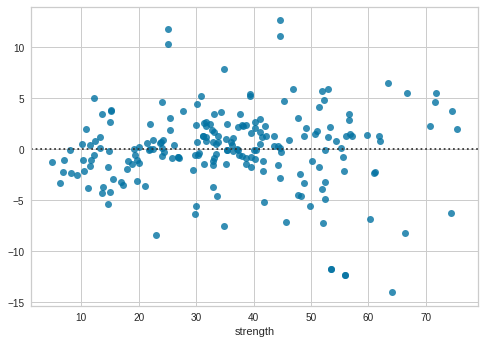

In [ ]:
sns.residplot(x=y_test, y=y_pred)
plt.show()

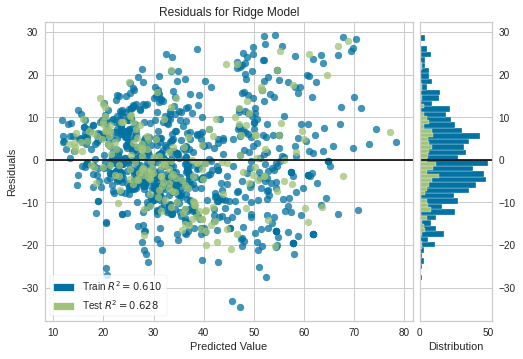

In [ ]:
# # Load a regression dataset
# X, y = load_concrete()

# # Create the train and test data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()     

model 3

In [ ]:
gbm_model_test = lightgbm.LGBMRegressor()
# Grid search CV
parameters = {'max_depth'     : [10,15,20],
              'learning_rate' : [0.15,0.2,0.25],
              'num_iteration' : [50,100,150],
              'n_estimators'  : [10,15,20],
              'num_leaves'    : [20,40,60]
              }        
gbm_grid = GridSearchCV(estimator=gbm_model_test, param_grid = parameters, cv = 4, 
                  verbose = 1, n_jobs = -1, refit = True)

In [ ]:
gbm_grid.fit(X_train,y_train, eval_set=[(X_test,y_test)], early_stopping_rounds=100)

Fitting 4 folds for each of 243 candidates, totalling 972 fits
[1]	valid_0's l2: 195.718
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 148.952
[3]	valid_0's l2: 113.737
[4]	valid_0's l2: 92.6876
[5]	valid_0's l2: 75.2845
[6]	valid_0's l2: 65.5505
[7]	valid_0's l2: 56.5915
[8]	valid_0's l2: 50.056
[9]	valid_0's l2: 45.7545
[10]	valid_0's l2: 41.7874
[11]	valid_0's l2: 38.3824
[12]	valid_0's l2: 36.0644
[13]	valid_0's l2: 34.1377
[14]	valid_0's l2: 32.3743
[15]	valid_0's l2: 31.4112
[16]	valid_0's l2: 30.5423
[17]	valid_0's l2: 29.411
[18]	valid_0's l2: 28.7298
[19]	valid_0's l2: 27.3716
[20]	valid_0's l2: 26.6466
[21]	valid_0's l2: 26.5747
[22]	valid_0's l2: 25.7539
[23]	valid_0's l2: 25.5744
[24]	valid_0's l2: 25.178
[25]	valid_0's l2: 24.9089
[26]	valid_0's l2: 24.5992
[27]	valid_0's l2: 24.2346
[28]	valid_0's l2: 24.1332
[29]	valid_0's l2: 23.7611
[30]	valid_0's l2: 23.513
[31]	valid_0's l2: 23.3
[32]	valid_0's l2: 22.972
[33]	valid_0's l2: 22.899
[

GridSearchCV(cv=4, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.15, 0.2, 0.25],
                         'max_depth': [10, 15, 20],
                         'n_estimators': [10, 15, 20],
                         'num_iteration': [50, 100, 150],
                         'num_leaves': [20, 40, 60]},
             verbose=1)

In [ ]:
# Truy xuất model với các tham số đã được tối ưu
gbm_model = gbm_grid.best_estimator_

In [ ]:
# Quan sát các tham số đã được tối ưu
gbm_model.get_params

<bound method LGBMModel.get_params of LGBMRegressor(learning_rate=0.2, max_depth=15, n_estimators=10,
              num_iteration=150, num_leaves=20)>

In [ ]:
#Tính R score của train và test theo lightgbm
print('R_2 scores của train:', round(r2_score(y_train,gbm_model.predict(X_train))*100,3),'%')
print('R_2 scores của test:', round(r2_score(y_test,gbm_model.predict(X_test))*100,3),'%')

R_2 scores của train: 99.076 %
R_2 scores của test: 92.987 %


In [ ]:
#Tính R score của catboost
y_pred = gbm_model.predict(X_test)
print('R_2 scores:', round(r2_score(y_test,y_pred)*100,2),'%')

R_2 scores: 92.99 %


In [ ]:
# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
mae = round(np.mean(errors),2)
print('Mean Absolute Error:', mae,'%')

Mean Absolute Error: 2.81 %


In [ ]:
mape = 100 * (errors /y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape) 
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 91.25 %.


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(mse)      

18.070333420268774


Text(0.5, 1.0, 'Request vs Predicted Request: $Y_i$ vs $\\hat{Y}_i$')

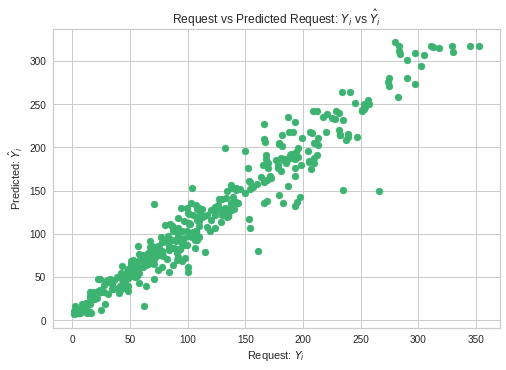

In [ ]:
plt.scatter(y_test, y_pred,color ='mediumseagreen')
plt.xlabel("Request: $Y_i$")
plt.ylabel("Predicted: $\hat{Y}_i$")
plt.title("Request vs Predicted Request: $Y_i$ vs $\hat{Y}_i$")

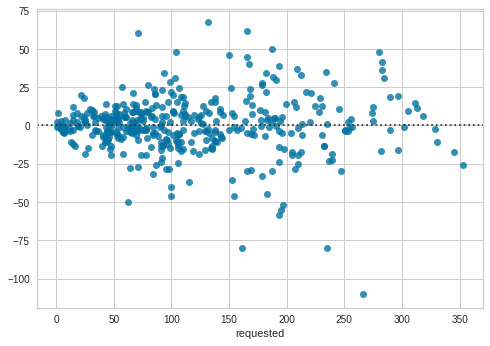

In [ ]:
sns.residplot(x=y_test, y=y_pred)
plt.show()

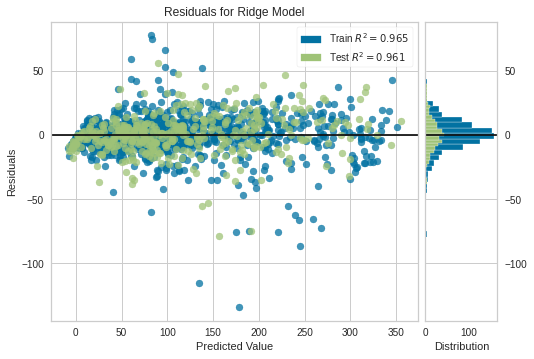

In [ ]:
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show() 